In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from PIL import Image
from sklearn.metrics import accuracy_score

In [2]:
# Charger les données d'entraînement et de test à partir des fichiers CSV
train_path = "../data/dataset/sign_mnist_train.csv"
test_path = "../data/dataset/sign_mnist_test.csv"

train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)


In [3]:
# Séparer les labels et les images
y_train = train_data["label"].values
X_train = train_data.drop(columns=["label"]).values

y_test = test_data["label"].values
X_test = test_data.drop(columns=["label"]).values

In [4]:
# Reshape des images (28x28) et normalisation des valeurs
X_train = X_train.reshape(-1, 28, 28) / 255.0
X_test = X_test.reshape(-1, 28, 28) / 255.0


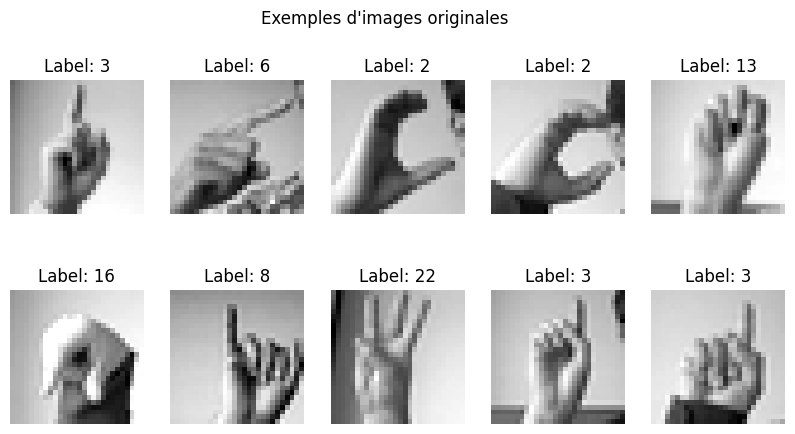

In [5]:
# Afficher quelques exemples d'images originales
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.suptitle("Exemples d'images originales")
plt.show()

In [6]:
# Extraction des caractéristiques HOG
def extract_hog_features(images, visualize=False):
    features = []
    hog_images = []
    for image in images:
        if visualize:
            hog_feature, hog_image = hog(
                image, 
                orientations=9, 
                pixels_per_cell=(8, 8), 
                cells_per_block=(2, 2), 
                block_norm='L2-Hys', 
                visualize=True
            )
            hog_images.append(hog_image)
        else:
            hog_feature = hog(
                image, 
                orientations=9, 
                pixels_per_cell=(8, 8), 
                cells_per_block=(2, 2), 
                block_norm='L2-Hys', 
                visualize=False
            )
        features.append(hog_feature)
    return np.array(features), hog_images if visualize else None


In [7]:
# Extraire les caractéristiques et les images HOG
X_train_hog, X_train_hog_images = extract_hog_features(X_train, visualize=True)
X_test_hog, _ = extract_hog_features(X_test)

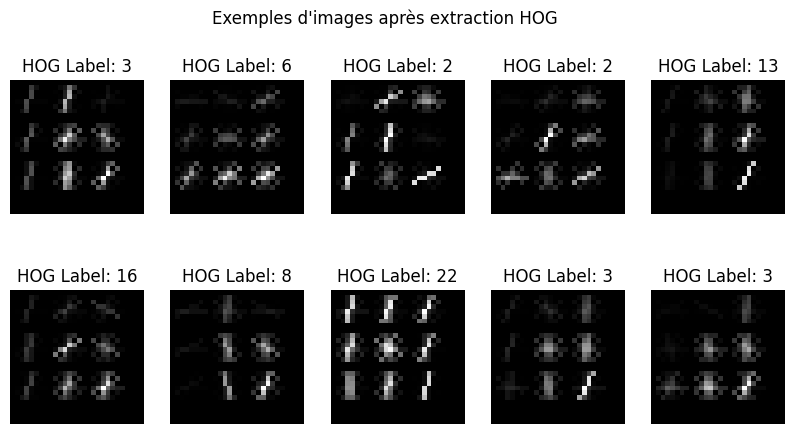

In [8]:
# Afficher quelques images après l'extraction HOG
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train_hog_images[i], cmap='gray')
    plt.title(f"HOG Label: {y_train[i]}")
    plt.axis('off')
plt.suptitle("Exemples d'images après extraction HOG")
plt.show()

Précision sur le jeu de validation : 0.9989075018208303
Précision sur le jeu de test : 0.8895705521472392

Rapport de classification :
               precision    recall  f1-score   support

           0       0.82      0.91      0.87       331
           1       0.99      0.89      0.93       432
           2       1.00      0.95      0.98       310
           3       0.84      0.85      0.85       245
           4       0.91      0.89      0.90       498
           5       0.94      0.96      0.95       247
           6       0.86      0.93      0.89       348
           7       0.93      0.93      0.93       436
           8       0.93      0.91      0.92       288
          10       0.80      0.84      0.82       331
          11       0.99      1.00      1.00       209
          12       0.84      0.88      0.86       394
          13       0.81      0.75      0.78       291
          14       1.00      0.98      0.99       246
          15       0.99      1.00      0.99       347

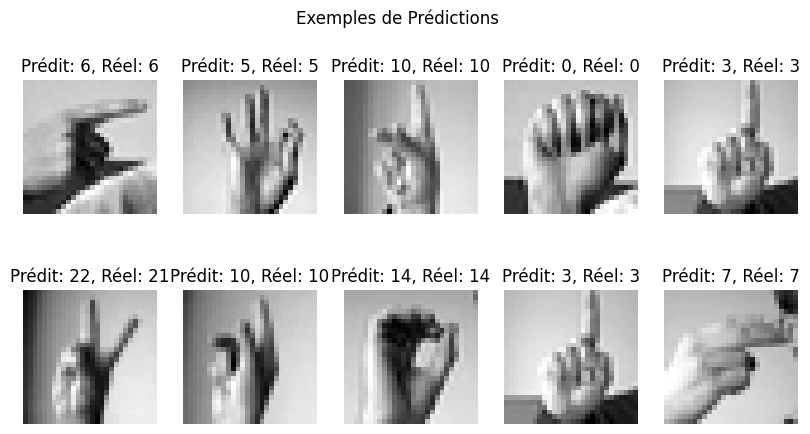

In [9]:
# Mise à l'échelle des données HOG
scaler = StandardScaler()
X_train_hog = scaler.fit_transform(X_train_hog)
X_test_hog = scaler.transform(X_test_hog)

# Diviser les données d'entraînement en sous-ensemble pour validation
X_train_hog, X_val_hog, y_train, y_val = train_test_split(X_train_hog, y_train, test_size=0.1, random_state=42)

# Fitting the data into the model
model = RandomForestClassifier()
model.fit(X_train_hog, y_train)


# Évaluer le modèle sur les données de validation
y_val_pred = model.predict(X_val_hog)
print("Précision sur le jeu de validation :", accuracy_score(y_val, y_val_pred))

# Évaluer le modèle sur les données de test
y_test_pred = model.predict(X_test_hog)
print("Précision sur le jeu de test :", accuracy_score(y_test, y_test_pred))
print("\nRapport de classification :\n", classification_report(y_test, y_test_pred))

# Afficher quelques prédictions
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"Prédit: {y_test_pred[i]}, Réel: {y_test[i]}")
    plt.axis('off')
plt.suptitle("Exemples de Prédictions")
plt.show()

In [18]:
from joblib import dump
# Sauvegarder le modèle après l'entraînement
dump(model, 'RandomForest_hog_model.joblib')

print("Modèle sauvegardé sous 'RandomForest_hog_model.joblib'")

Modèle sauvegardé sous 'svm_hog_model.joblib'
